# <center>**CIFAR10 IMAGE RECOGNITION**</center> 
<h3 align=right></h3>

## DATASET SUMMARY : 

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.The images are divided into the following 10 classes:
0. Airplanes
1. Cars
2. Birds
3. Cats
4. Deers
5. Dogs
6. Frogs
7. Horses
8. Ships
9. Trucks 


The classes are completely mutually exclusive. There is no overlap between automobiles and trucks. "Automobile" includes sedans, SUVs, things of that sort. "Truck" includes only big trucks. Neither includes pickup trucks.

<b><u>Problem Statement</u></b> : To design a model to predict the label of the images in CIFAR-10 dataset correctly.

<b>Data Source:</b> https://www.cs.toronto.edu/~kriz/cifar.html



## **DATA PREPROCESSING:**

Let's start with preprocessing the data. 
There are basically the following steps involved:
1. Reading the dataset
2. Splitting the data into test and train sets
3. Converting the datasets to numpy arrays
4. Normalizing the X_train and X_test
5. One hot encoding of the labels in the train and test sets

So, before proceeding with these steps, let's import all the necessary libraries required for this project. 

In [1]:
# Loading the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import pickle
import warnings
warnings.filterwarnings('ignore')
sns.set_style('dark')
import os
import keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, AveragePooling2D, Flatten, Dropout, BatchNormalization, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras import regularizers
from tensorflow.keras.models import load_model

Using TensorFlow backend.


In [2]:
# Loading the dataset
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [3]:
# Printing the info of dataset
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)


In [4]:
# Converting to numpy arrays
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [5]:
# Mean shifting and variance centering 
mean = np.mean(X_train, axis = (0,1,2))
std = np.std(X_train, axis = (0,1,2))

In [6]:
# Normalization
X_train = (X_train-mean)/(std + 1e-7)
X_test = (X_test-mean)/(std + 1e-7)

In [7]:
# One hot encoding
y_train_cat = keras.utils.to_categorical(y_train,10)
y_test_cat = keras.utils.to_categorical(y_test,10)

In [8]:
input_shape = X_train.shape[1:]

In [9]:
input_shape

(32, 32, 3)

## EXPLORATORY DATA ANALYSIS

In [10]:
# Defining dictionary for labels
data_dict = {0 : "Airplane",
             1 : "Car",
             2 : "Bird",
             3 : "Cat",
             4 : "Deer",
             5 : "Dog",
             6 : "Frog",
             7 : "Horse",
             8 : "Ship",
             9 : "Truck",
            }

In [11]:
# Function to display random images
def get_random_images():
    d = {}
    while len(d.keys()) < 10:
        idx = random.randint(0, len(y_train)-1)
        if y_train[idx][0] not in d.keys():
            d[y_train[idx][0]] = idx
    return d

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

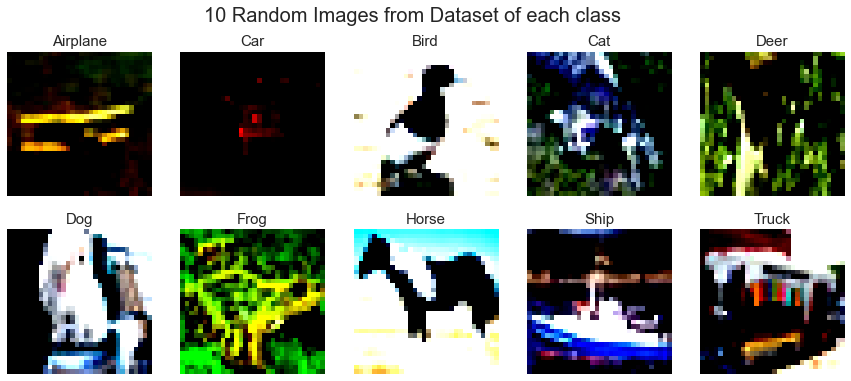

In [12]:
# Plotting sample images from each class
d = get_random_images()
rows= 2
cols=5
fig,axes = plt.subplots(rows, cols, figsize = (15,6))
axes = axes.ravel()
for i in range(1, rows*cols+1):
    axes[i-1].imshow(X_train[d[i-1]])
    axes[i-1].axis('off')
    axes[i-1].set_title(data_dict[i-1], fontsize=15)
fig.suptitle('10 Random Images from Dataset of each class', fontsize = 20)
plt.show()

## DATA MODELLING

In [13]:
# Initializing decay
weight_decay = 1e-4

In [14]:
# Defining model architecture
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (3,3), padding='same', input_shape = input_shape, kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(filters = 32, kernel_size = (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.2))

model.add(Conv2D(filters = 64, kernel_size = (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(filters = 64, kernel_size = (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(filters = 128, kernel_size = (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(filters = 128, kernel_size = (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(units = 10, activation = 'softmax'))
    

In [15]:
# Viewing model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0

In [16]:
# Compiling the model
model.compile(loss = 'categorical_crossentropy', optimizer= tf.keras.optimizers.RMSprop(lr = 0.001, decay = 1e-6), metrics=['accuracy'])

In [17]:
# Fitting the model
epochs_hist = model.fit(X_train, y_train_cat, batch_size=64, epochs=10, validation_split=0.2, shuffle=True)

Epoch 1/10
625/625 [==============================] - 252s 403ms/step - loss: 1.8571 - accuracy: 0.4496 - val_loss: 1.2057 - val_accuracy: 0.6138
Epoch 2/10
625/625 [==============================] - 257s 411ms/step - loss: 1.1918 - accuracy: 0.6213 - val_loss: 1.0044 - val_accuracy: 0.6896
Epoch 3/10
625/625 [==============================] - 252s 403ms/step - loss: 1.0042 - accuracy: 0.6822 - val_loss: 0.8454 - val_accuracy: 0.7321
Epoch 4/10
625/625 [==============================] - 257s 411ms/step - loss: 0.9006 - accuracy: 0.7167 - val_loss: 0.8177 - val_accuracy: 0.7536
Epoch 5/10
625/625 [==============================] - 259s 414ms/step - loss: 0.8284 - accuracy: 0.7427 - val_loss: 0.7394 - val_accuracy: 0.7769
Epoch 6/10
625/625 [==============================] - 250s 400ms/step - loss: 0.7727 - accuracy: 0.7626 - val_loss: 0.7258 - val_accuracy: 0.7818
Epoch 7/10
625/625 [==============================] - 251s 401ms/step - loss: 0.7309 - accuracy: 0.7813 - val_loss: 0.6797 -

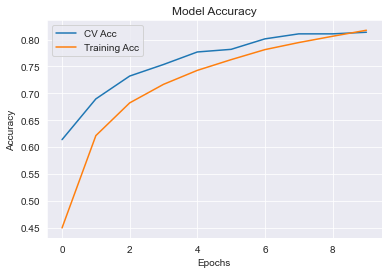

In [18]:
# Plotting training and validation set accuracy
plt.plot(epochs_hist.history['val_accuracy'], label = 'CV Acc')
plt.plot(epochs_hist.history['accuracy'], label = 'Training Acc')
plt.title("Model Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid()
plt.legend()

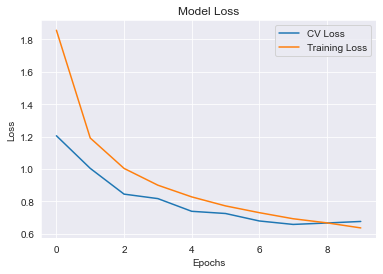

In [19]:
# Plotting training and validation set loss
plt.plot(epochs_hist.history['val_loss'], label = 'CV Loss')
plt.plot(epochs_hist.history['loss'], label = 'Training Loss')
plt.title("Model Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid()
plt.legend()
plt.show()

In [20]:
# Evaluating the model using the test set
score = model.evaluate(X_test, y_test_cat, batch_size=128, verbose=1)

79/79 [==============================] - 10s 132ms/step - loss: 0.7020 - accuracy: 0.8101


In [21]:
print("Accuracy on Test Set : {:.2f}%".format(score[1]*100))

Accuracy on Test Set : 81.01%


In [22]:
# Saving the model (model_name) in desired path(save_dir) 
save_dir = os.path.join(os.getcwd(), 'models')
model_name = 'keras_cifar10_trained_model.h5'
# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

Saved trained model at C:\Users\roopa\CIFAR FLASK\flask_deploy\models\keras_cifar10_trained_model.h5 


In [23]:
# Model prediction on test data
y_pred=model.predict(X_test)

In [24]:
# Converting the prediction to corresponding class numbers
pred_class = y_pred.argmax(axis=-1)

In [25]:
# Function to convert to image
def convertDataToImage(image):
    img = image.astype('float32')
    img /= 255
    c = np.zeros(32*32*3).reshape((1,32,32,3))
    c[0] = img
    return c

In [26]:
# Loading the model
model = load_model('C:/Users/roopa/CIFAR FLASK/flask_deploy//models/keras_cifar10_trained_model.h5')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

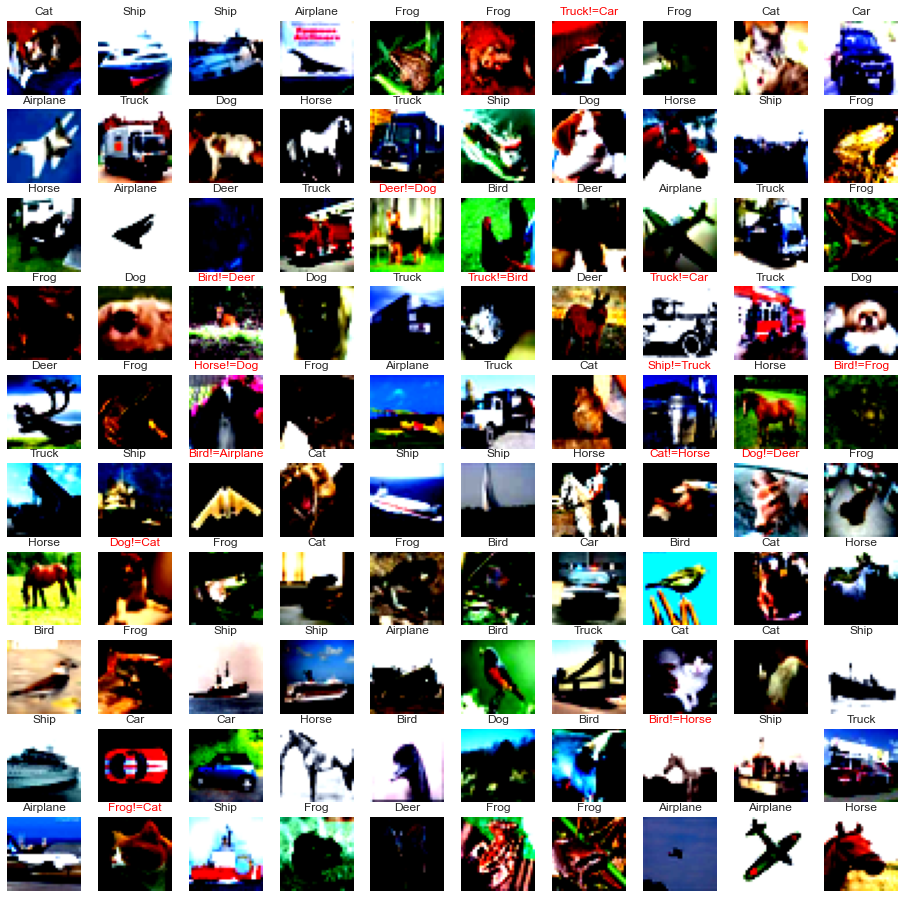

In [27]:
# Plotting the images along with predictions
plt.figure(figsize=(16,16))

right = 0
mistake = 0

for i in range(100):
    image = X_test[i]
    plt.subplot(10, 10, i+1)
    plt.imshow(image)
    plt.axis('off')
    if pred_class[i] == y_test[i][0]:
        plt.title(data_dict.get(pred_class[i]))
        right += 1
    else:
        plt.title(data_dict.get(pred_class[i]) + "!=" +data_dict.get(y_test[i][0]), color='#ff0000')
        mistake += 1
plt.show()

In [28]:
# Displaying the results
print("The number of correct answers:", right)
print("The number of mistake:", mistake)
print("A correct answer rate:", right/(mistake + right)*100, '%')

The number of correct answers: 86
The number of mistake: 14
A correct answer rate: 86.0 %


In [29]:
model_json = model.to_json()

In [30]:
with open("model.json","w") as json_file:
    json_file.write(model_json)

In [32]:
model.save_weights("model.h5")